<a href="https://colab.research.google.com/github/mkaustubh/data-analytics/blob/main/2021KaggleMachineLearning%26DataScienceSurvey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Kaggle Competitons Dataset

In [ ]:
!pip install kaggle

In [15]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

! cp /content/drive/MyDrive/ColabNotebooks/kaggle.json ~/.kaggle/

In [17]:
! cp /content/drive/MyDrive/ColabNotebooks/kaggle.json ~/.kaggle/

In [18]:
! chmod 600 ~/.kaggle/kaggle.json

In [19]:
! kaggle competitions download kaggle-survey-2021

kaggle_survey_2021_answer_choices.pdf: Skipping, found more recently modified local copy (use --force to force download)
kaggle_survey_2021_methodology.pdf: Skipping, found more recently modified local copy (use --force to force download)
kaggle_survey_2021_responses.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
!unzip /content/kaggle_survey_2021_responses.csv.zip

Archive:  /content/kaggle_survey_2021_responses.csv.zip
replace kaggle_survey_2021_responses.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: kaggle_survey_2021_responses.csv  


# Importing several helpful packages

In [21]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [22]:
path = '/content/kaggle_survey_2021_responses.csv.zip'

In [23]:
data=pd.read_csv(path,usecols= ['Q1','Q2','Q3','Q4','Q5','Q6','Q20','Q21','Q22','Q25','Time from Start to Finish (seconds)'])
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q20,Q21,Q22,Q25
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,In what industry is your current employer/cont...,What is the size of the company where you are ...,Approximately how many individuals are respons...,What is your current yearly compensation (appr...
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999"
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999"
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Academics/Education,"1000-9,999 employees",0,$0-999
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Academics/Education,"1000-9,999 employees",0,"30,000-39,999"


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Time from Start to Finish (seconds)  25974 non-null  object
 1   Q1                                   25974 non-null  object
 2   Q2                                   25974 non-null  object
 3   Q3                                   25974 non-null  object
 4   Q4                                   25974 non-null  object
 5   Q5                                   25974 non-null  object
 6   Q6                                   25974 non-null  object
 7   Q20                                  16326 non-null  object
 8   Q21                                  16252 non-null  object
 9   Q22                                  16127 non-null  object
 10  Q25                                  15392 non-null  object
dtypes: object(11)
memory usage: 2.2+ MB


In [25]:
data['Time in (seconds)'] = data['Time from Start to Finish (seconds)'][1:].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time from Start to Finish (seconds)  25974 non-null  object 
 1   Q1                                   25974 non-null  object 
 2   Q2                                   25974 non-null  object 
 3   Q3                                   25974 non-null  object 
 4   Q4                                   25974 non-null  object 
 5   Q5                                   25974 non-null  object 
 6   Q6                                   25974 non-null  object 
 7   Q20                                  16326 non-null  object 
 8   Q21                                  16252 non-null  object 
 9   Q22                                  16127 non-null  object 
 10  Q25                                  15392 non-null  object 
 11  Time in (seconds)           

In [26]:
data.drop(['Time from Start to Finish (seconds)'],axis=1,inplace=True)

In [27]:
data1 = data.iloc[1:,:]
data1.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q20,Q21,Q22,Q25,Time in (seconds)
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",910.0
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",784.0
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Academics/Education,"1000-9,999 employees",0,$0-999,924.0
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Academics/Education,"1000-9,999 employees",0,"30,000-39,999",575.0
5,45-49,Man,India,Doctoral degree,Other,< 1 years,Academics/Education,50-249 employees,5-9,"30,000-39,999",781.0


In [28]:
data1['Year'] = 2021

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
data1.columns = ['Age','Gender','Country','Education','Job','Experiance','Industry','Total Employee','Data Scientist','Salary','Numbers','Year']
data1.head()

,Age,Gender,Country,Education,Job,Experiance,Industry,Total Employee,Data Scientist,Salary,Numbers,Year
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",910.0,2021
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",784.0,2021
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Academics/Education,"1000-9,999 employees",0,$0-999,924.0,2021
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Academics/Education,"1000-9,999 employees",0,"30,000-39,999",575.0,2021
5,45-49,Man,India,Doctoral degree,Other,< 1 years,Academics/Education,50-249 employees,5-9,"30,000-39,999",781.0,2021


In [30]:
data1['Age'].isnull()

1        False
2        False
3        False
4        False
5        False
         ...  
25969    False
25970    False
25971    False
25972    False
25973    False
Name: Age, Length: 25973, dtype: bool

# Graphs

### Percentage of Gender

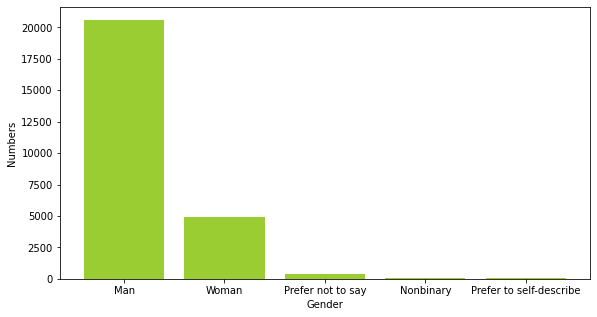

In [31]:
plt.figure(figsize=(9.5,5))
y = data1.Gender.value_counts()
x = y.index
visual_1 = plt.bar(x,y,color ="yellowgreen")
plt.xlabel('Gender')
plt.ylabel('Numbers')
plt.show()

Conclusion: Most of survey participants are men

### Exploring the ages

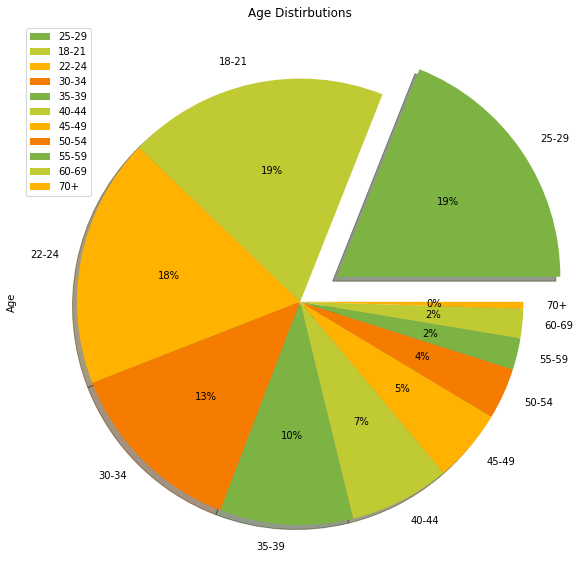

In [32]:
plt.figure(figsize=(10,12))
plt.style.use('seaborn-deep')
color = ['#7CB342','#C0CA33','#FFB300','#F57C00']
x = data1['Age'].value_counts()
x.plot(kind = 'pie',autopct = '%1.0f%%', colors=color, title = 'Age Distirbutions',shadow='true',explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0))
plt.legend(loc="upper left")
plt.show()

Age of most participants range between 18-29 i.e.38%

### Education Distributions

In [33]:
data1['Education'] = data1['Education'].replace({"Some college/university study without earning a bachelor’s degree":"Some university/college"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


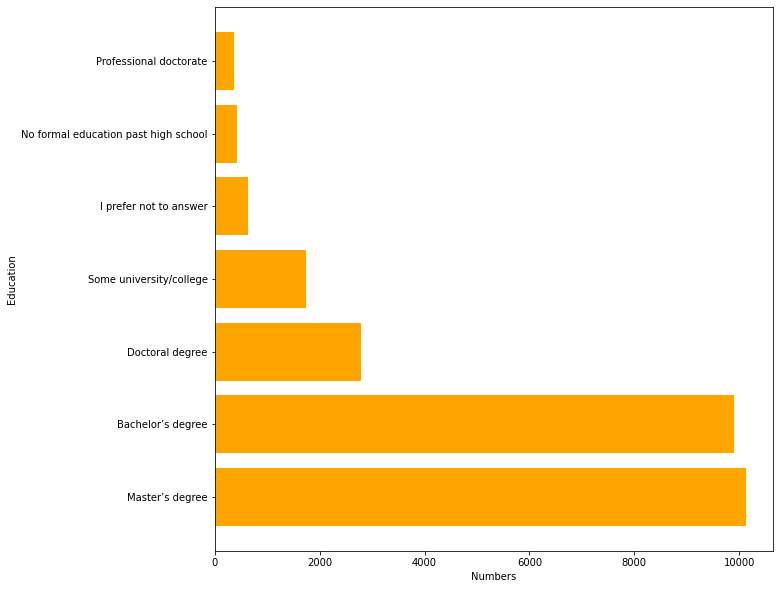

In [34]:
plt.figure(figsize=(10,10))
y = data1.Education.value_counts()
x = y.index
visual_2 = plt.barh(x, y, color='orange')
plt.xlabel('Numbers')
plt.ylabel('Education')
plt.style.use('dark_background')
plt.show()

Conclusion: Most participants have a master

### Deep dive into Age and Gender together

In [35]:
visual_1_grp = data1.groupby(['Age','Gender'])['Numbers'].sum().reset_index()
visual_1 = px.bar(data_frame=visual_1_grp, x='Gender', y='Numbers', color='Age',
                  barmode='group', title='Age and Gender distribution')
visual_1.show()

### Countries with most number of participants

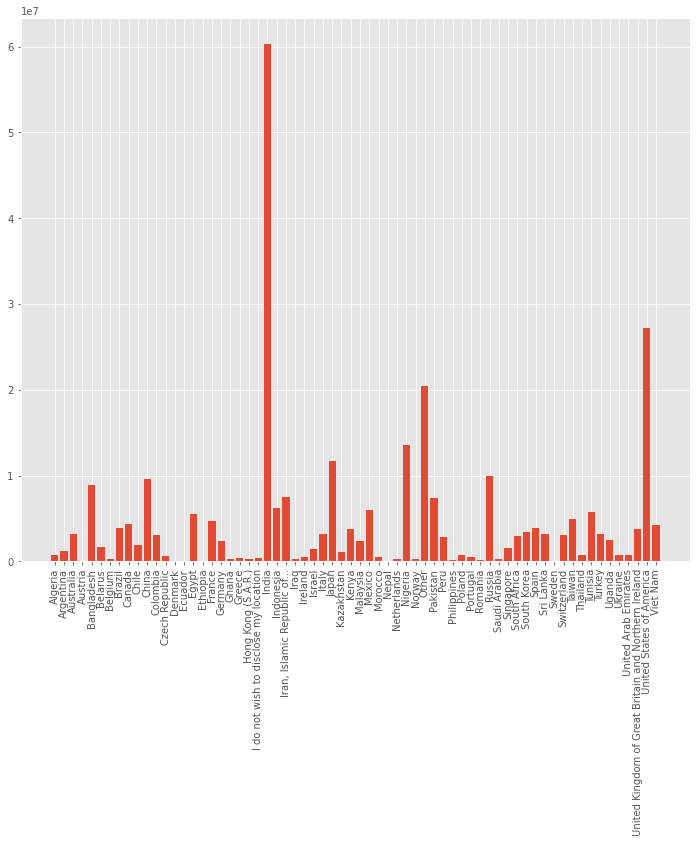

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
y = data1.groupby('Country')['Numbers'].sum()
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

### treemap for more elaboration 

In [37]:
plt.figure(figsize=(10,10))
visuals = data1[['Gender','Country']].value_counts().reset_index()
visual_2 = px.choropleth(visuals, locations='Country', color='Gender', locationmode='country names', title='Countries among gen', animation_frame='Gender')
visual_2.show()

<Figure size 720x720 with 0 Axes>

Conclusion: India and USA are the top most contributers 

### Exploring Age vs Job

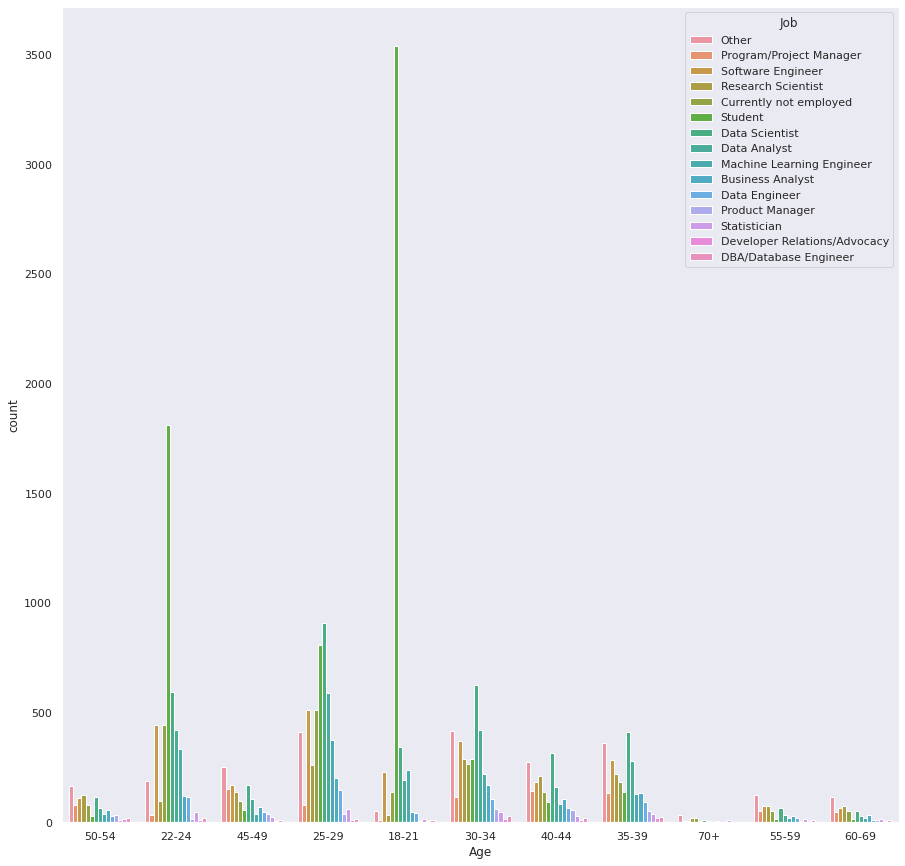

In [38]:
plt.figure(figsize=(15,15))
sns.set_theme(style="dark")
ax = sns.countplot(x=data1.Age, hue=data1.Job)

Age range between 18-40 people are more in Data Science field

### Exploring Industries

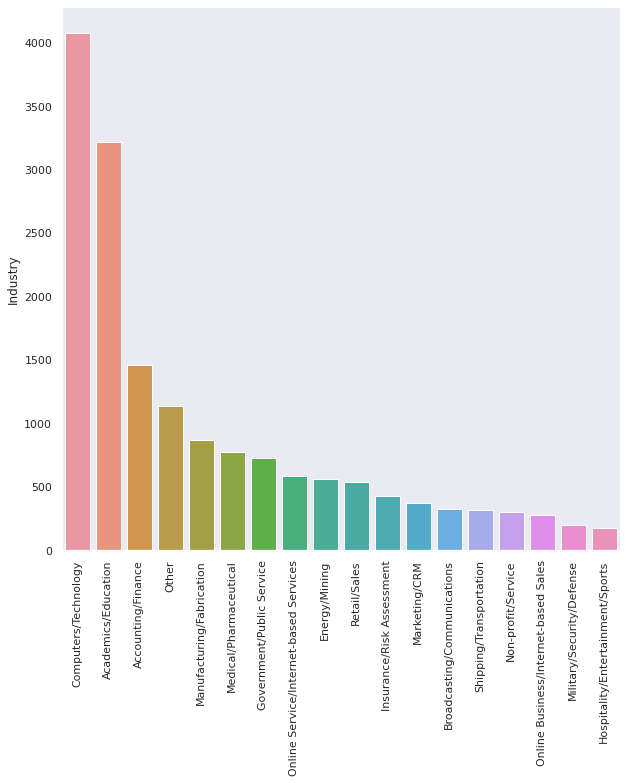

In [39]:
plt.figure(figsize=(10,10))
y = data1['Industry'].value_counts()
x = y.index
plt.xticks(rotation=90)
ax = sns.barplot(x = x,y = y )
sns.set_theme(style='dark')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



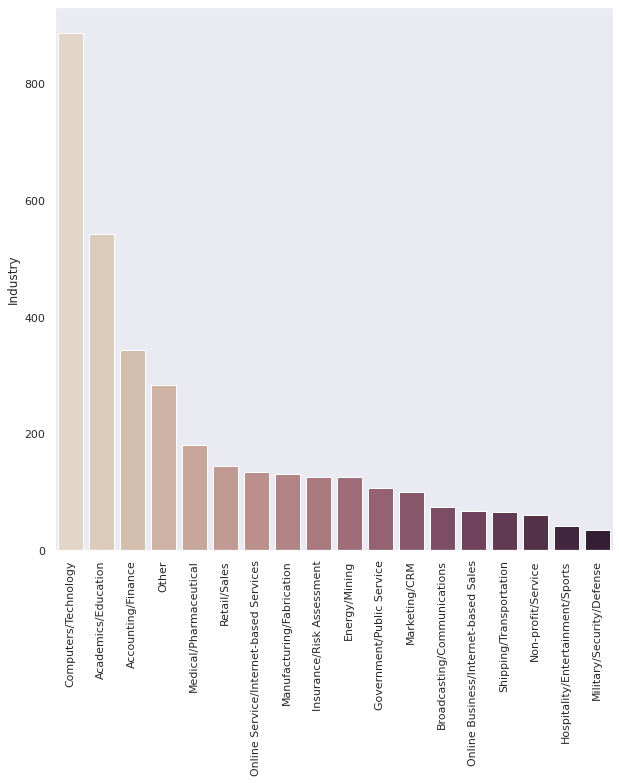

In [40]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
y = data1[data1['Job'] == 'Data Scientist']['Industry'].value_counts()
x = y.index
ax = sns.barplot(x,y,palette="ch:.25")

Conclusion: Technology, Academics and Accounting are the major industries focusing on Data Science

### Exploring Education among Job

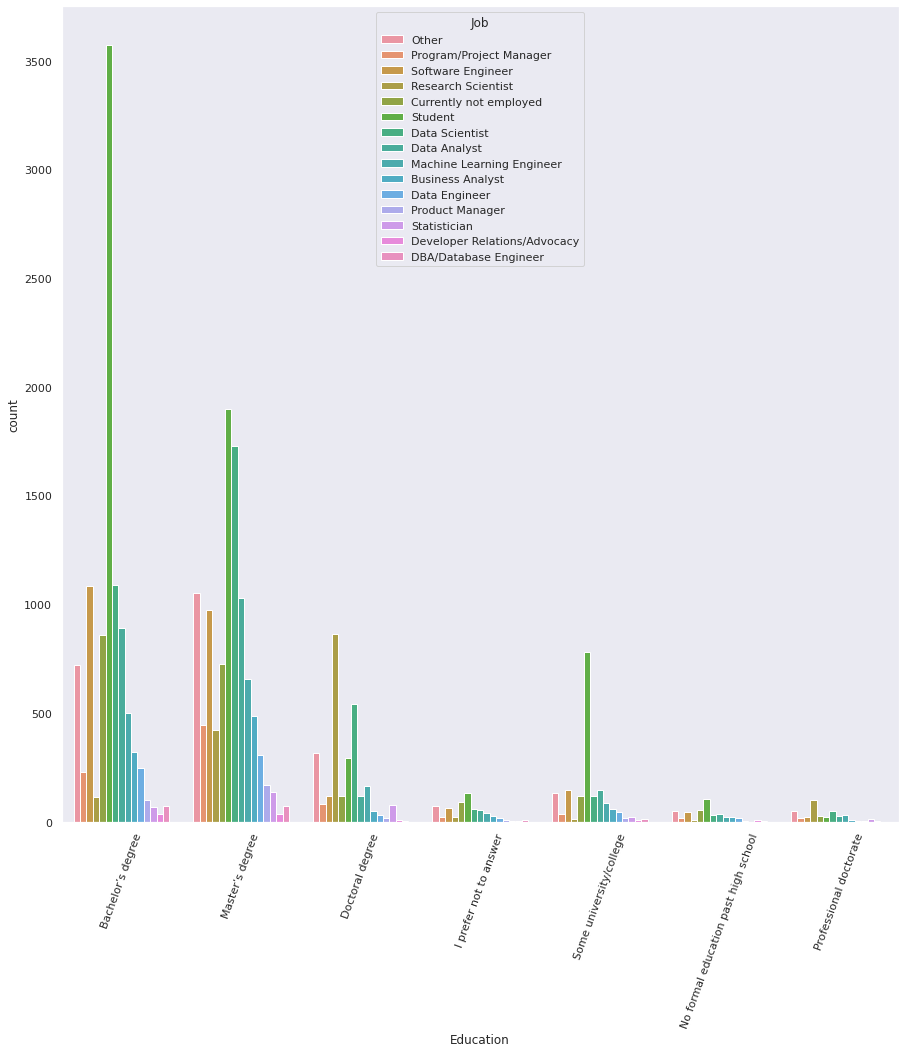

In [41]:
plt.figure(figsize=(15,15))
sns.set_theme(style="dark")
plt.xticks(rotation=70)
ax = sns.countplot(x=data1.Education, hue=data1.Job)

Conclusion: So we discoveres that most of people have master degree are data scientist and most of have a Doctoral degree are data analysts and all most of people have bachelor degree are Software Engineers

### Most Jobs in 2021

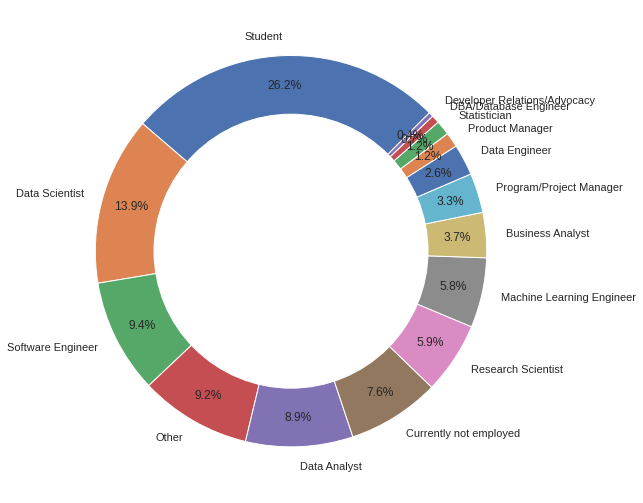

In [42]:
plt.figure(figsize=(9,9))
plt.style.use('seaborn-dark')
x = data1['Job'].value_counts()
plt.pie (x, labels = x.index , startangle=45, autopct='%1.1f%%',pctdistance=0.85)
my_circle=plt.Circle( (0,0), 0.7, color='white') # Adding circle at the centre
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Conclusion: Most Jobs in 2021 are in Data Science Field

In [43]:
# function to select the column quickly
def col(q,c):
    x = []
    for i in range(1,c+1):
        st = f'Q{q}_Part_{i}'
        x.append(st)
    return x

In [44]:
part7 = col(7,12)

In [45]:
data2 = pd.read_csv(path, skiprows=[1],
                    usecols= ['Q6','Q8','Q11','Q13','Q15'])
d = pd.read_csv(path, skiprows=[1],
                    usecols=part7)

### Experiences among the Data

No handles with labels found to put in legend.


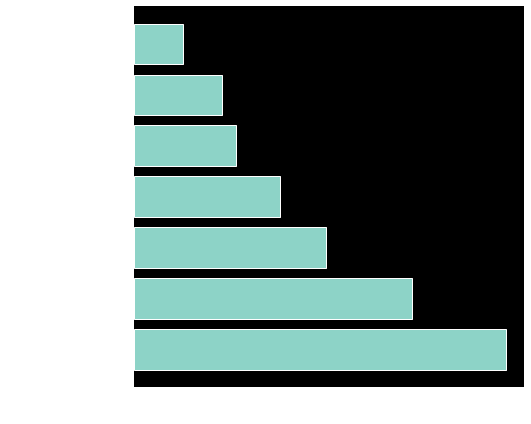

In [46]:
plt.figure(figsize=(7,7))
y = data2['Q6'].value_counts()
x = y.index
plt.style.use('dark_background')
plt.xticks(rotation=70)
plt.legend()

visual = plt.barh(x,y)

Conclusion: Most experience are in between 1-3 years

In [47]:
# since i have alot of same column with many parts..
# This function will take the data and merge all columns in one column with number of occurence of the value
def merge(x,itr,no,string='None'):
    merged = {}
    for i in range(1,itr):
        merged.update(dict(x[f'Q{no}_Part_{i}'].value_counts()))
    merged1 = pd.DataFrame(merged.items(), columns = [string, 'counts'])
    return merged1

### Programming and Recomended Languages

In [48]:
lang = merge(d,itr = 13,no = 7, string = 'Language')
lang.head()

,Language,counts
0,Python,21860
1,R,5334
2,SQL,10756
3,C,4709
4,C++,5535


Most Used Language

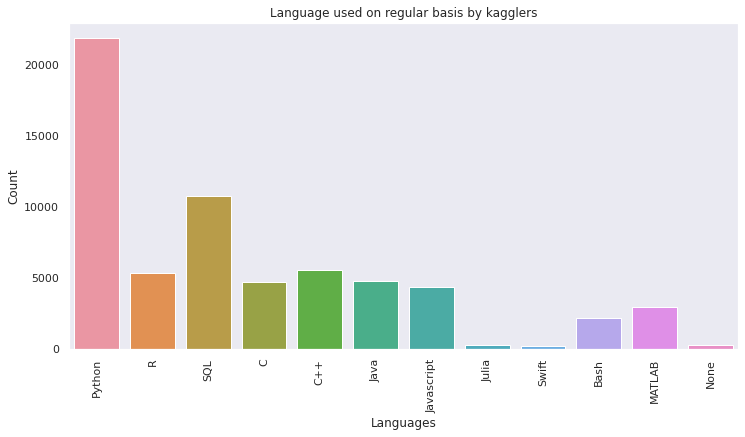

In [49]:
x=lang['Language']
y=lang['counts']
sns.set_theme(style="dark")
plots = sns.barplot(x = x, y = y)
plt.xticks(rotation = 90)
plt.xlabel("Languages")
plt.ylabel("Count")
plt.title("Language used on regular basis by kagglers")
plt.gcf().set_size_inches(12,6)
plt.show()

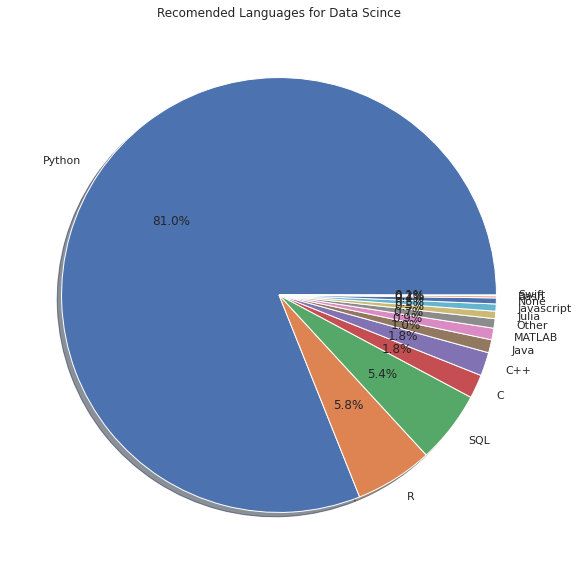

In [50]:
plt.figure(figsize=(10,10))
y = data2['Q8'].value_counts()
x = y.index
plt.title('Recomended Languages for Data Scince')
visual = plt.pie(y,labels=x,autopct = '%1.1f%%',shadow=True)

Conclusion: Python is the most commonly used and recomended language among scientists

### Hardware Data Science Use for their Projects

[Text(0.5, 0, 'Hardware')]

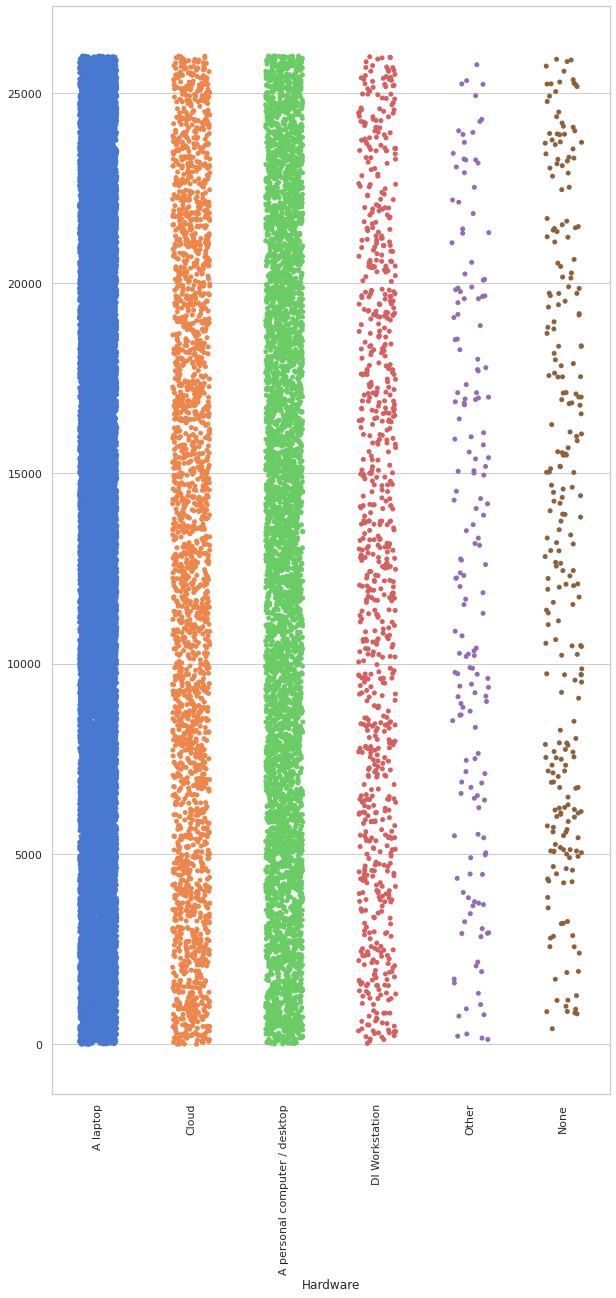

In [51]:
data2['Q11'] = data2['Q11'].replace({'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)':'Cloud',
                                     'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)':'Dl Workstation'})
plt.figure(figsize=(10,20))
sns.set_theme(style="whitegrid", palette="muted")
y = data2['Q11']
x= y.index
ax = sns.stripplot(x=y, y=x, jitter=0.2)
plt.xticks(rotation=90)
ax.set(xlabel="Hardware")

Conclusion: Laptops is the most common used hardware

### Is TPU used frequently

[Text(0.5, 0, 'TPU')]

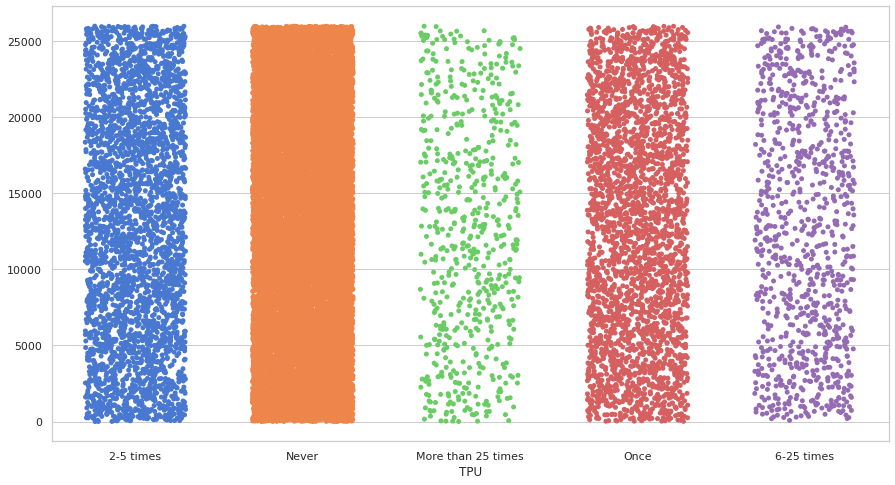

In [52]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid", palette="muted")
y = data2['Q13']
x= y.index
ax = sns.stripplot(x=y, y=x, jitter=0.3)
ax.set(xlabel="TPU")

Conclusion: Many scientists never used TPU

### Experience with ML

In [53]:
data2['Q15'] = data2['Q15'].replace({'I do not use machine learning methods':'no experince'})

[Text(0.5, 0, 'ML Experiance')]

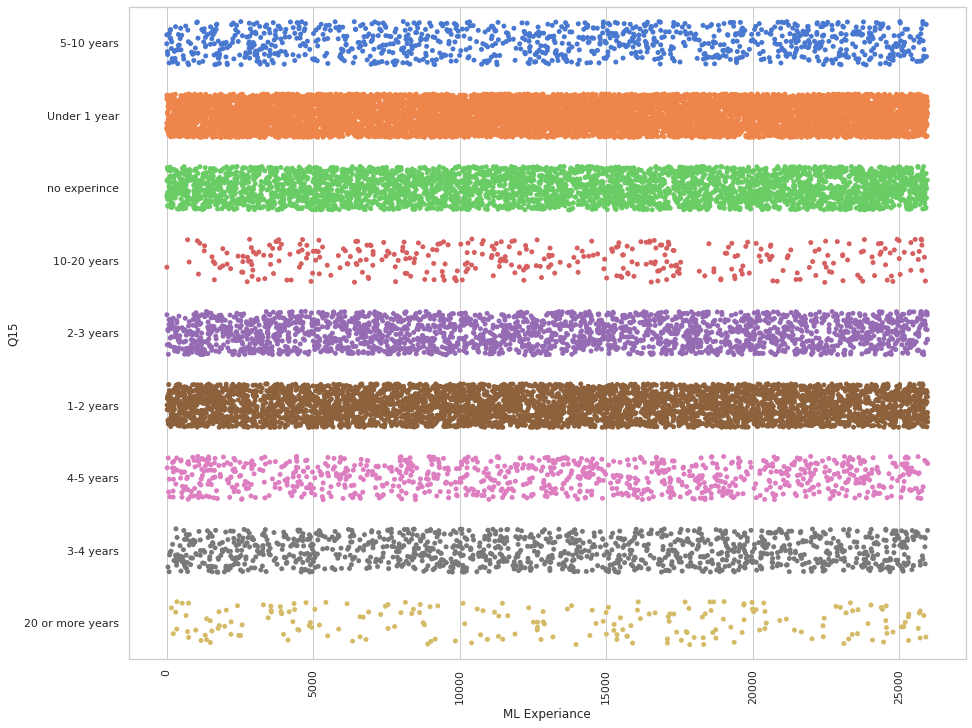

In [54]:
plt.figure(figsize=(15,12))
sns.set_theme(style="whitegrid", palette="muted")
y = data2['Q15']
x= y.index
ax = sns.stripplot(x=x, y=y, jitter=0.3)
plt.xticks(rotation=90)
ax.set(xlabel="ML Experiance")

### Are IDE's used Regularly

In [55]:
part9 = col(9,12)
part10 = col(10,15)

In [56]:
datax = pd.read_csv(path, skiprows=[1],
                    usecols= part9) 

In [57]:
datax.head()

,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,Jupyter Notebook,NaN
2,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN
3,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN
4,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,MATLAB,Jupyter Notebook,NaN


In [58]:
data = merge(datax,itr = 12,no = 9,string='nn')
data.head()

,nn,counts
0,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",5488
1,RStudio,4771
2,Visual Studio,4110
3,Visual Studio Code (VSCode),10040
4,PyCharm,7468


In [59]:
data['nn'] = data['nn'].replace({'Jupyter (JupyterLab, Jupyter Notebooks, etc) ':'Jupyter'})
data.head()

,nn,counts
0,Jupyter,5488
1,RStudio,4771
2,Visual Studio,4110
3,Visual Studio Code (VSCode),10040
4,PyCharm,7468


### Platform Used

[Text(0.5, 0, 'most used platforms')]

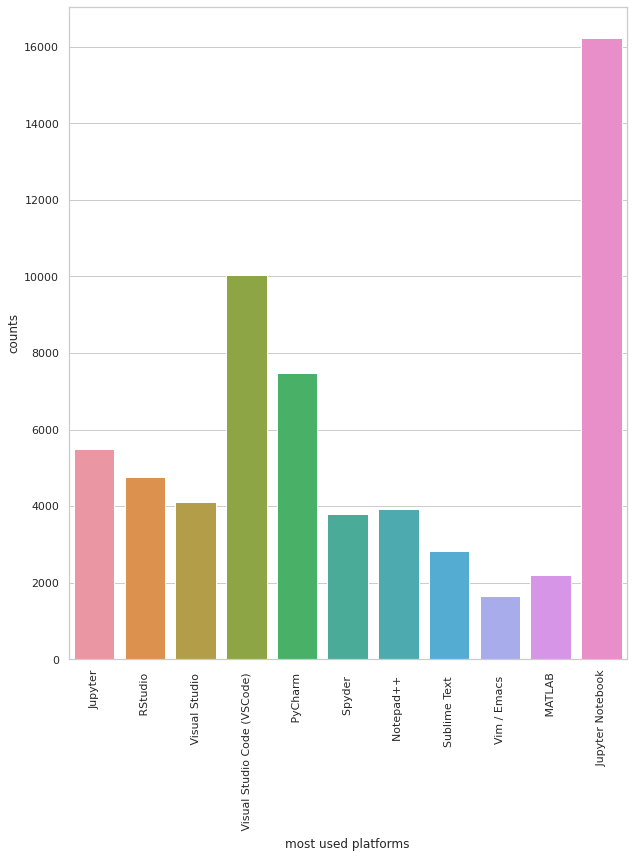

In [60]:
plt.figure(figsize=(10,12))
sns.set_theme(style="whitegrid", palette="muted")
y = data['counts']
x= data['nn']
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=90)
ax.set(xlabel="most used platforms")

Conclusion: Jupyter is the most used platform

In [61]:
data3 = pd.read_csv(path, skiprows=[1],
                    usecols= part10)

In [62]:
dataa = merge(data3,itr=15,no=10,string='s')
dataa.head()

,s,counts
0,Kaggle Notebooks,9507
1,Colab Notebooks,9792
2,Azure Notebooks,1062
3,Paperspace / Gradient,209
4,Binder / JupyterHub,1770


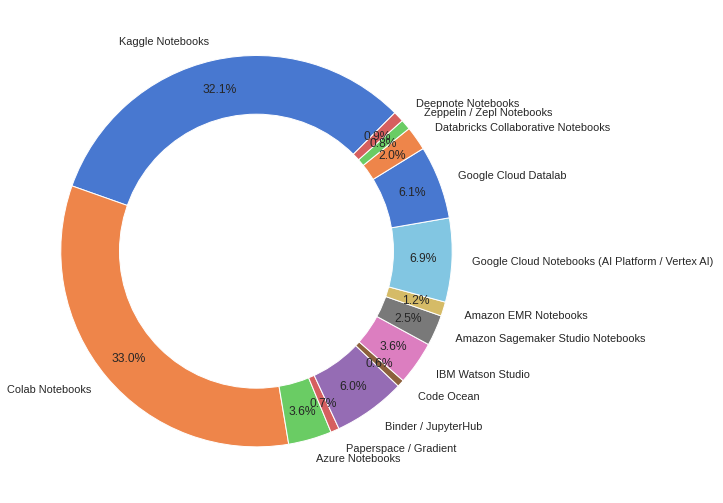

In [63]:
plt.figure(figsize=(9,9))
plt.style.use('seaborn-dark')
x = dataa['counts']
plt.pie (x, labels = dataa['s'] , startangle=45, autopct='%1.1f%%',pctdistance=0.85)
my_circle=plt.Circle( (0,0), 0.7, color='white') # Adding circle at the centre
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Conclusion: Colab and Kaggle notebooks are the most used products

In [64]:
part_12 = col(12,5)

In [65]:
data4 = pd.read_csv(path, skiprows=[1],
                    usecols= part_12)
data4.head()

,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5
0,NaN,Google Cloud TPUs,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,None
2,NaN,NaN,NaN,NaN,NaN
3,NVIDIA GPUs,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,None


### Most used Visualization Tool

In [66]:
part_14 = col(14,11)

In [67]:
data5 = pd.read_csv(path, skiprows=[1],
                    usecols= part_14)

In [68]:
data = merge(data5,itr=11,no=14,string='Libraries')
data.head()

,Libraries,counts
0,Matplotlib,17595
1,Seaborn,12586
2,Plotly / Plotly Express,5778
3,Ggplot / ggplot2,5100
4,Shiny,1322


[Text(0.5, 0, 'most used libraries')]

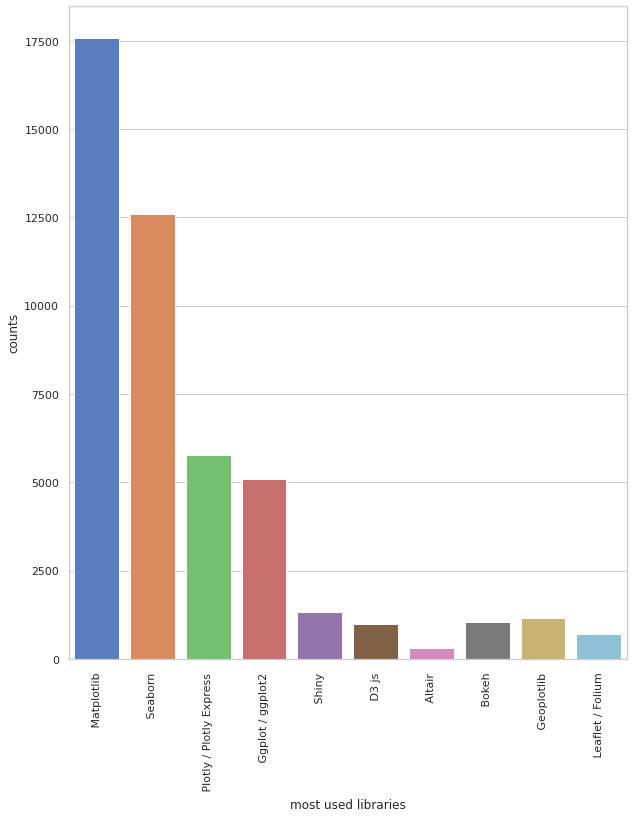

In [69]:
plt.figure(figsize=(10,12))
sns.set_theme(style="whitegrid", palette="muted")
y = data['counts']
x= data['Libraries']
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=90)
ax.set(xlabel="most used libraries")

Conclusion: Matplotlib is the most used library

In [70]:
data_6 = pd.read_csv(path, skiprows=[1],
                    usecols= ['Q21','Q22','Q23'])

### Data Science Work Loads

In [71]:
by=['0','1-2','3-4','5-9','10-15','15-19','20+']
x = data_6.sort_values(by=['Q22'])['Q22']
x = x.dropna()

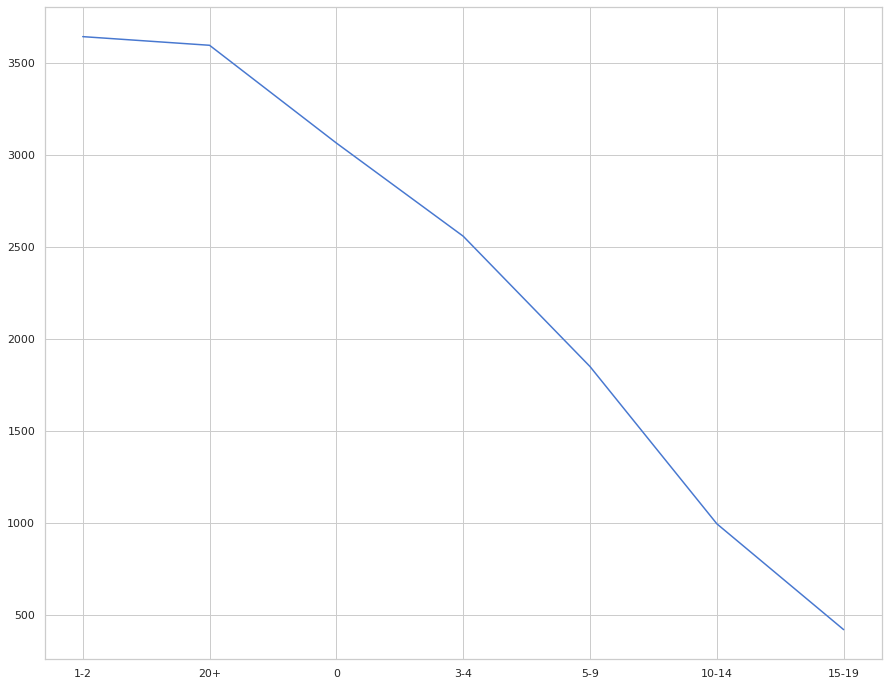

In [72]:
plt.figure(figsize=(15,12))
y = x.value_counts()
y.plot(kind='line')

### Spread of ML among the scientists

[Text(0.5, 0, 'ML Experiance')]

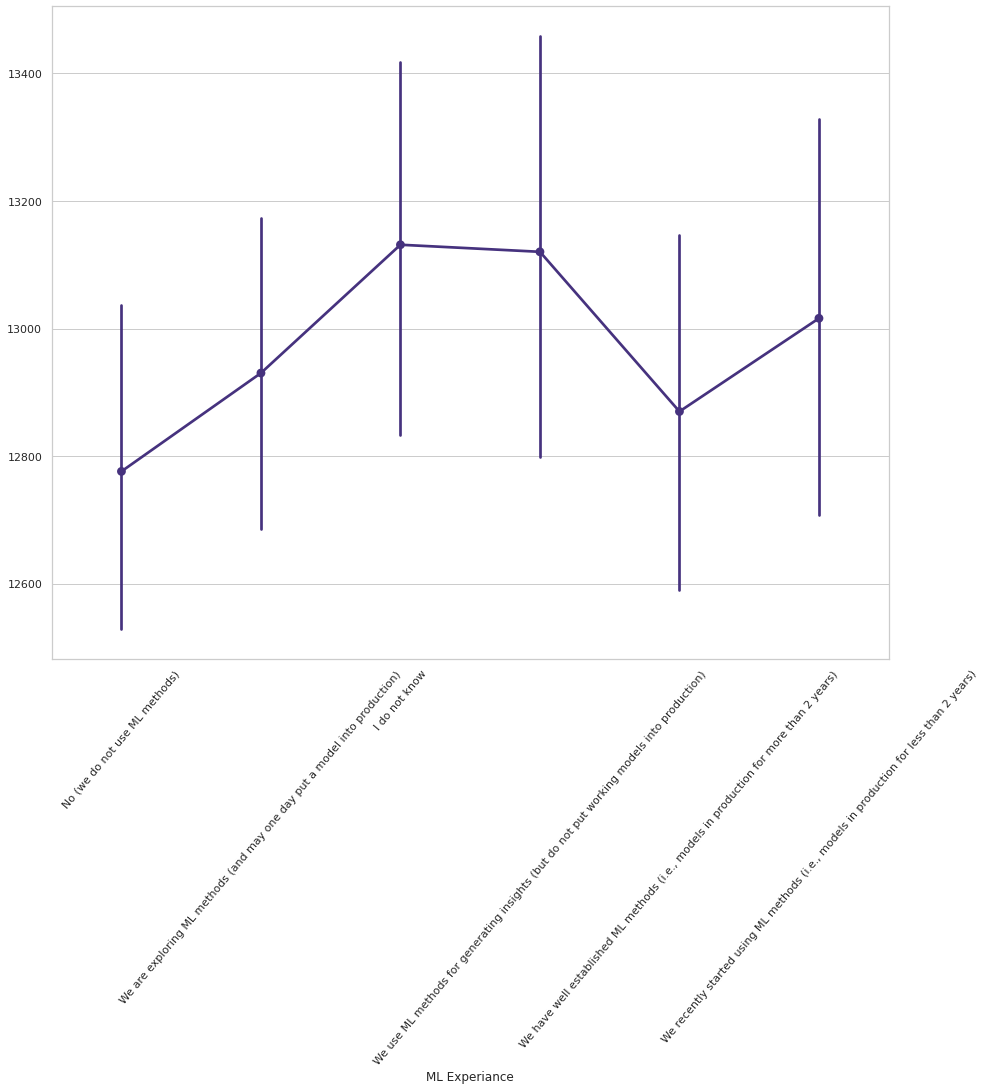

In [73]:
plt.figure(figsize=(15,12))
sns.set_theme(style="whitegrid", palette='viridis')
y = data_6['Q23']
x= y.index
ax = sns.pointplot(x=y, y=x)
plt.xticks(rotation=50)
ax.set(xlabel="ML Experiance")

Conclusion: The data indicates that most of our participants are still didn't start to use ML but they start to exploring it and use it in insights.

### Exploring Salary dustributions and the amount of money spent on ML

In [74]:
data_final = data5 = pd.read_csv(path, skiprows=[1],
                    usecols=['Q25','Q26','Q28'])

In [75]:
data_final['Q26'].value_counts()

$0 ($USD)                  5903
$100-$999                  2534
$1000-$9,999               2491
$1-$99                     1929
$10,000-$99,999            1309
$100,000 or more ($USD)    1017
Name: Q26, dtype: int64

In [76]:
data_final['Q26'] = data_final['Q26'].replace({'$100,000 or more ($USD)':'+ $1000,000'})

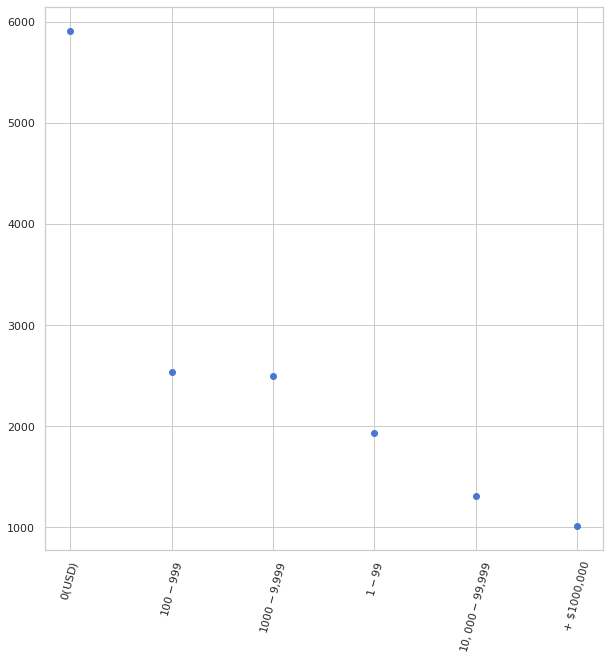

In [77]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid", palette="muted")
y = data_final['Q26'].value_counts()
plt.xticks(rotation=75)
x= y.index
ax = plt.scatter(x=x, y=y)

Conclusion: clearly there's alot of organization that didn't start to spent money on machine learning